### Importing major libraries

In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [166]:
# setting appropriate styles
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
plt.rcParams['figure.figsize']=10,6

In [167]:
df=pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [168]:
# checking the shape of the file
df.shape

(663522, 9)

#### It's a large dataset as can be seen from the shape

In [169]:
# checking meta data of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [170]:
# checking null values
df.isnull().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

#### As can be seen above, only 2 columns namely zip and twp have null values. All other columns are fine. we will see how to deal with these null values later on

In [171]:
# now let us see these 2 columns and check how uch % of values of null in these 2 columns
df[['zip', 'twp']].isnull().mean()*100

zip    12.086864
twp     0.044158
dtype: float64

#### zip column has ~12% null values and twp ~4%

In [172]:
# Now let us check the description of the numerical columns and some basic statistics

df.describe()

,lat,lng,zip,e
count,663522.000000,663522.000000,583323.000000,663522.0
mean,40.158162,-75.300105,19236.055791,1.0
std,0.220641,1.672884,298.222637,0.0
min,0.000000,-119.698206,1104.000000,1.0
25%,40.100344,-75.392735,19038.000000,1.0
50%,40.143927,-75.305143,19401.000000,1.0
75%,40.229008,-75.211865,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


#### As can be seen above, out of 4 numerical values, column "e" has only single value throughout the column hence the column has no value and it is better to drop it.

In [173]:
df.drop(columns=['e'], inplace=True)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


In [174]:
# Now let us check the cardinality of all the columns
df.nunique()

lat           25949
lng           25980
desc         663282
zip             204
title           148
timeStamp    640754
twp              68
addr          41292
dtype: int64

### Check top 10 zip and locality from where the calls were made

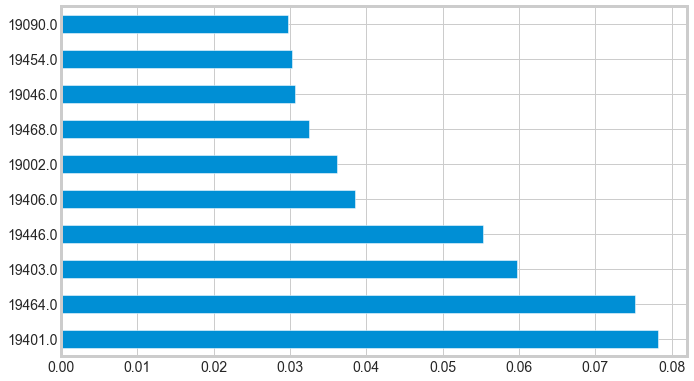

In [175]:
df['zip'].value_counts(normalize=True).sort_values(ascending=False).head(10).plot(kind='barh')

In [176]:
d=df['zip'].value_counts(normalize=True).sort_values(ascending=False).head(10)

d

19401.0    0.078183
19464.0    0.075276
19403.0    0.059809
19446.0    0.055321
19406.0    0.038510
19002.0    0.036121
19468.0    0.032467
19046.0    0.030662
19454.0    0.030277
19090.0    0.029790
Name: zip, dtype: float64

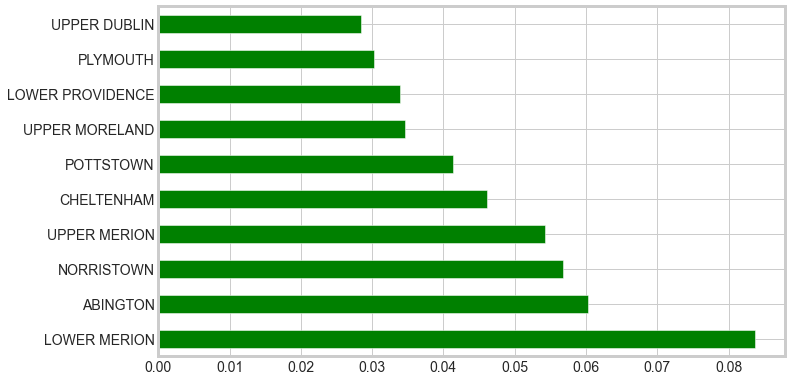

In [177]:
df['twp'].value_counts(normalize=True).sort_values(ascending=False).head(10).plot(kind='barh', color='green')

#### Max calls ~8% came from Lower Merion township and 19401 zip code

In [178]:
# creating column "issue" from the column "title" using string manipulation

df['issue']=df['title'].astype(str).apply(lambda x: x.split(":")[1])

In [179]:
# creating column "category" from the column "title" using string manipulation
df['issue_category']=df['title'].astype(str).apply(lambda x: x.split(":")[0])

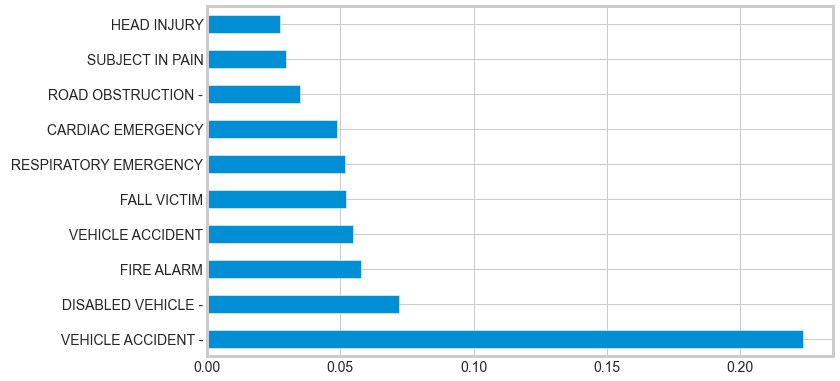

In [180]:
df['issue'].value_counts(normalize=True).sort_values(ascending=False).head(10).plot(kind='barh')

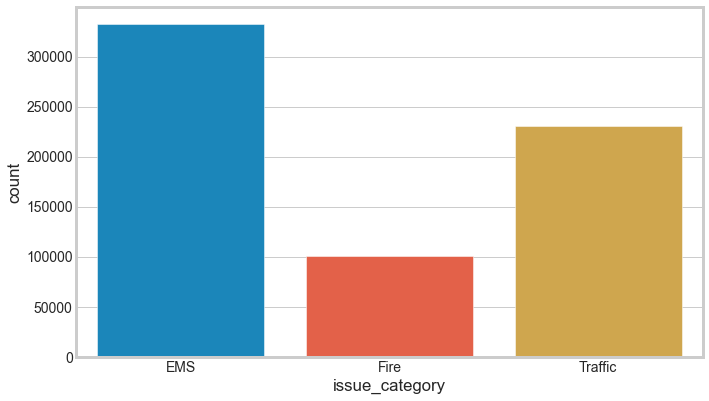

In [181]:
sns.countplot(df['issue_category'])

#### Let's make some columns related to date, day, day of week etc to see if the intensity of the calls is related to a particular period

In [182]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,issue,issue_category
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,BACK PAINS/INJURY,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,DIABETIC EMERGENCY,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,GAS-ODOR/LEAK,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,CARDIAC EMERGENCY,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,DIZZINESS,EMS


In [183]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   lat             663522 non-null  float64       
 1   lng             663522 non-null  float64       
 2   desc            663522 non-null  object        
 3   zip             583323 non-null  float64       
 4   title           663522 non-null  object        
 5   timeStamp       663522 non-null  datetime64[ns]
 6   twp             663229 non-null  object        
 7   addr            663522 non-null  object        
 8   issue           663522 non-null  object        
 9   issue_category  663522 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 50.6+ MB


#### timeStamp column changed to datetime object

In [185]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,issue,issue_category
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,BACK PAINS/INJURY,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,DIABETIC EMERGENCY,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,GAS-ODOR/LEAK,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,CARDIAC EMERGENCY,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,DIZZINESS,EMS


In [186]:
df['date']=df['timeStamp'].dt.date
df['hour']=df['timeStamp'].dt.hour
df['dayofweek']=df['timeStamp'].dt.dayofweek
df['month']=df['timeStamp'].dt.month

In [187]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,issue,issue_category,date,hour,dayofweek,month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,BACK PAINS/INJURY,EMS,2015-12-10,17,3,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,DIABETIC EMERGENCY,EMS,2015-12-10,17,3,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,GAS-ODOR/LEAK,Fire,2015-12-10,14,3,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,CARDIAC EMERGENCY,EMS,2015-12-10,16,3,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,DIZZINESS,EMS,2015-12-10,16,3,12


In [188]:
weekmap={0:'mon', 1:'tue', 2: 'wed', 3: 'thu', 4: 'fri', 5: 'sat', 6: 'sun'}
df['dayofweek']=df['dayofweek'].map(weekmap)

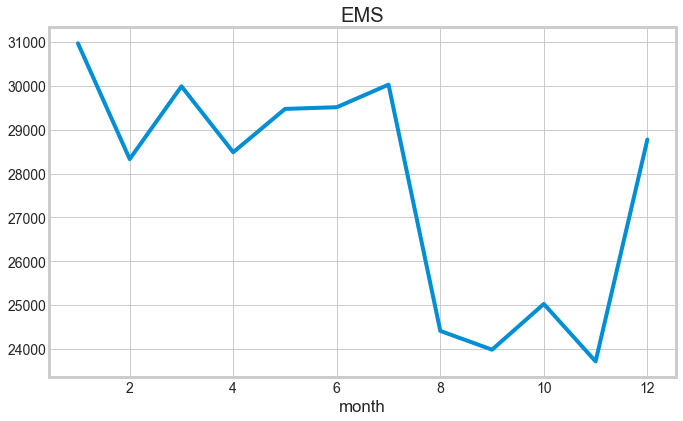

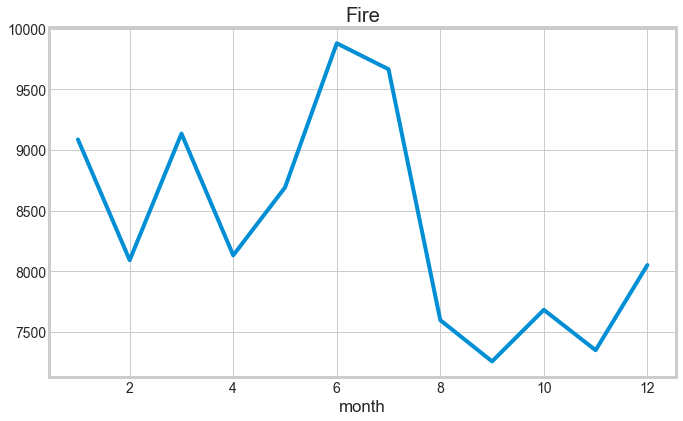

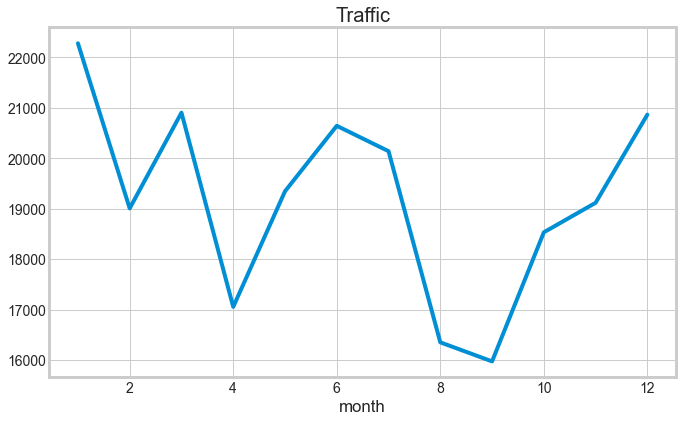

In [189]:
for cat in df['issue_category'].unique():
    plt.subplot(111)
    df_cat=df[df['issue_category']==cat]
    df_cat_new=df_cat.groupby('month')['issue_category'].count()
    df_cat_new.plot()
    plt.title(cat)
    plt.show()
    
    

#### It is observed that majority of the calls come during the earlier part of the year except for some traffic related calls which are high during christmas month

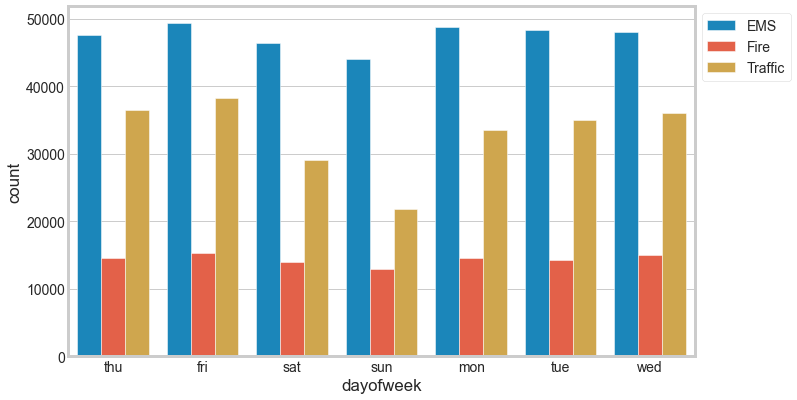

In [190]:
sns.countplot(df['dayofweek'], hue=df['issue_category'])
plt.legend(bbox_to_anchor=(1,1))

#### As expected, calls during weekends are less than weekdays

In [191]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,issue,issue_category,date,hour,dayofweek,month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,BACK PAINS/INJURY,EMS,2015-12-10,17,thu,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,DIABETIC EMERGENCY,EMS,2015-12-10,17,thu,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,GAS-ODOR/LEAK,Fire,2015-12-10,14,thu,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,CARDIAC EMERGENCY,EMS,2015-12-10,16,thu,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,DIZZINESS,EMS,2015-12-10,16,thu,12


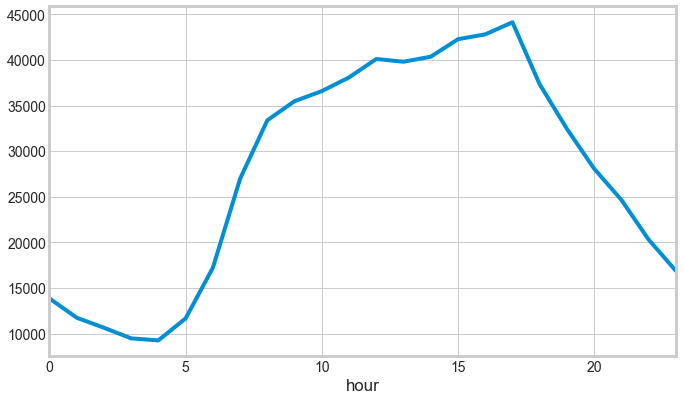

In [192]:
df.groupby('hour')['hour'].count().plot(xlim=[0,23])

#### It can be seen that max calls were made during the office closing hours

### Let's check what was the emergency type during peak hours

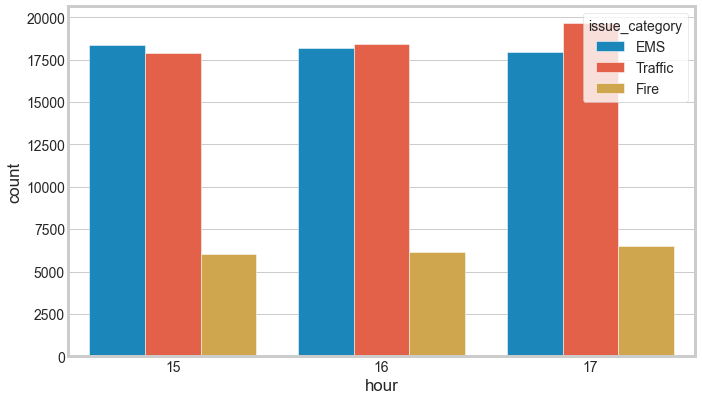

In [193]:
df_temp=df[df['hour'].isin([15,16,17])]

sns.countplot(df_temp['hour'], hue=df_temp['issue_category'])

#### which issues had most calls during the peak hours

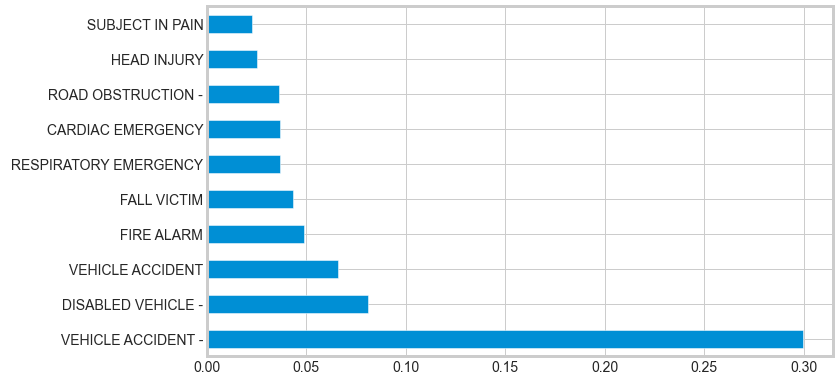

In [194]:
df_temp['issue'].value_counts(normalize=True).sort_values(ascending=False).head(10).plot(kind='barh')

#### Clearly it can be seen that max calls were due to vehicle accident during the peak hours i.e office closing time which seems realistic due to extreme traffic movement during these hours

In [195]:
df_pivot=df.pivot_table(values='date', index='dayofweek', columns='hour', aggfunc='count')
df_pivot

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,,,,
fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,5584,5843,5994,6181,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,5458,5632,5881,5664,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,4944,5450,5555,5378,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,4262,4438,4882,4654,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,5464,5492,5898,6173,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,5498,5582,5795,5794,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,5367,5639,6092,5953,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


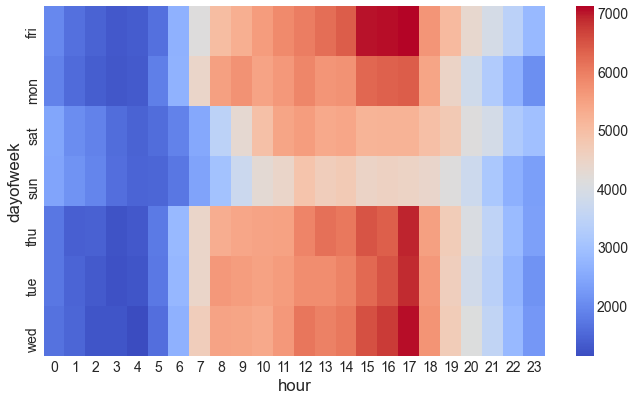

In [196]:
sns.heatmap(df_pivot, cmap='coolwarm')

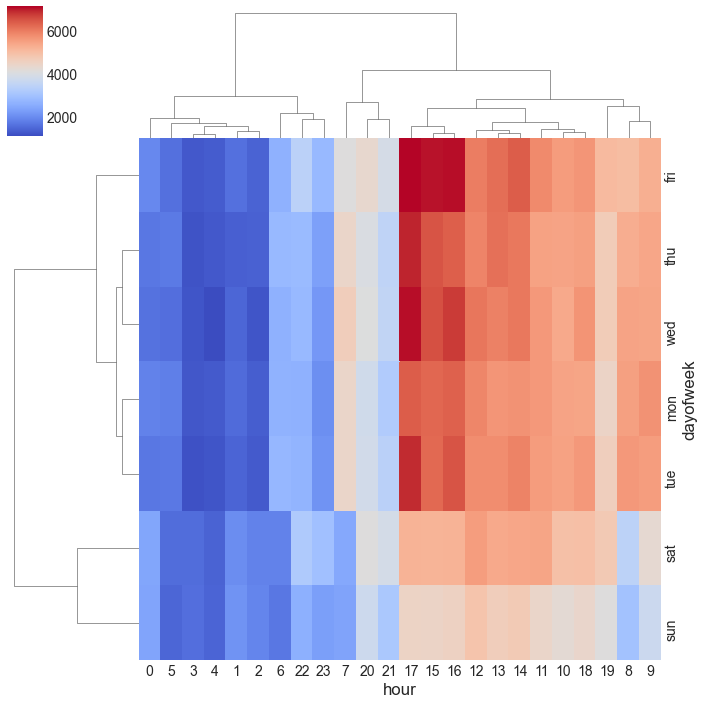

In [197]:
sns.clustermap(df_pivot, cmap='coolwarm')

### This confirms that maximum calls were made during weekdays and around peak office closing hours. This concludes the basic EDA on the dataset. we can further perform preprocessing to impute missing values, transform the data and use appropriate machine learning modeling to predict future calls.